In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [62]:
def compute(X, y):
	# train test split
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
	regr = linear_model.LinearRegression()

	graph(X_train, y_train)

	return regress(X_train, y_train, regr, transform= concatenated_elements), regress(X_test, y_test, regr, transform=concatenated_elements)

'''
	* create train by selecting index of X and converting to numpy array
	* fit the linear regression
'''
def regress(X, y, regr, transform):
	transform(X)

	regr.fit(X, y)
	y_pred = regr.predict(X)
	error = mean_squared_error(y, y_pred)
	score = r2_score(y, y_pred)
	print("Mean squared error on train: ", error)
	print("Training R2: ", score)
	return error, score


'''
	* convert subarrays of shape (5,5) into single arrays that contain 25 entries
'''
def concatenated_elements(X):
	# remove days 6-10 from training
	for i in range(len(X)):
		try:
			X[i] = np.concatenate(X[i])
		except:
			print(X[i])
'''
	* graph the averages of high/low/open/close of the five 
	* days vs the slope from days 6-10
'''
def graph(X, y):
	X_labels = []
	for i in range(len(X)):
		X_labels.append(np.mean(X[i]))
	
	# print(X_labels)
	plot = sns.scatterplot(x=X_labels, y=y, hue=y)
	plot.set(title= 'average of 5 days vs slope', 
			 xlabel= ('average of high/low/open/close across 5 days'), 
			 ylabel= 'slope of change')
'''
	* split data into 10 day cylcles,
	* find slope of days 6-10,
	* drop days 6-10 so training data includes only
	* "historical data"
'''
def label_data(X, cycle, future):
	# create y label vector.
	# after reading the dataframe in, convert to groups of 10 days
	y = np.zeros((X.shape[0] // cycle))
	X = np.array_split(X, X.shape[0] / cycle)

	# label the 10 day groups based on days 6-10(day 10 close - day 6 open)
	for i in range(len(X)):
		stock_open = X[i].Open.to_numpy()
		stock_close = X[i].Close.to_numpy()
		y[i] = round(stock_close[cycle - 1] - stock_open[cycle - future], 2)
	
	# remove days 6-10 from X
	for i in range(len(X)):
		X[i] = X[i][:cycle - future].to_numpy()
	
	return X, y



Mean squared error on train:  7.8254542235517155
Training R2:  0.1332867896098603
Mean squared error on train:  4.55099606103973
Training R2:  0.4114765244844947


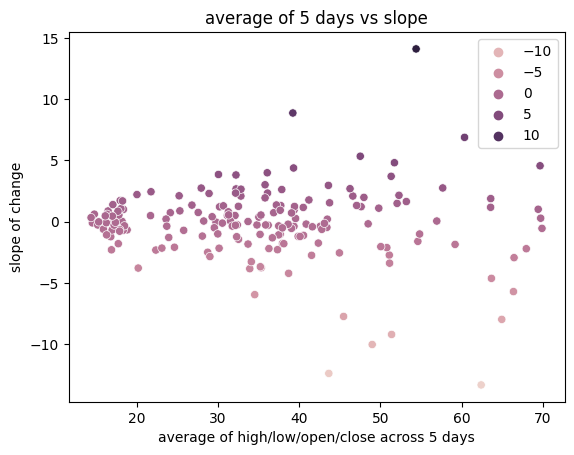

In [63]:
# read in dataframe and reduce to 'Open', 'High', 'Low', 'Close', and 'Volume'
data = pd.read_csv("TWTR.csv")
X = data[['Open', 'High', 'Low', 'Close']]

error_score = []
# create y label vector
X, y = label_data(X, 10, 5)
error_score.append(compute(X, y))


# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean squared error on train:  4.209879019211285
Training R2:  0.03754054654694361
Mean squared error on train:  5.096386806739967
Training R2:  0.09746595055431861


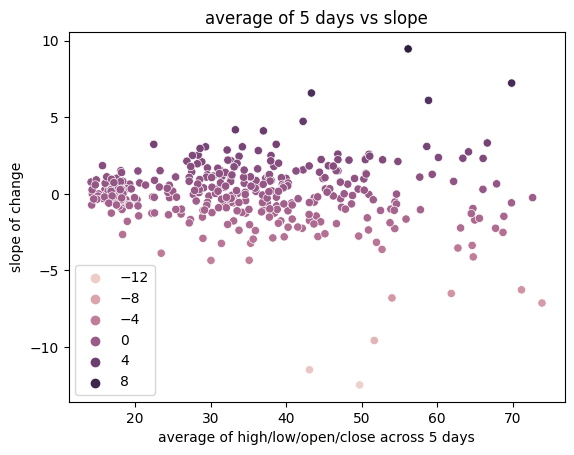

In [64]:
X = data[['Open', 'High', 'Low', 'Close']]
X, y = label_data(X, 5, 3)
error_score.append(compute(X,y))


# regr = linear_model.LinearRegression()

# graph(X_train, y_train)

# regress(X_train, y_train, regr, transform= concatenated_elements)
# regress(X_test, y_test, regr, transform=concatenated_elements)

Mean squared error on train:  2.259833630778794
Training R2:  0.061371119506096306
Mean squared error on train:  1.7110066620459443
Training R2:  0.3841046110817742


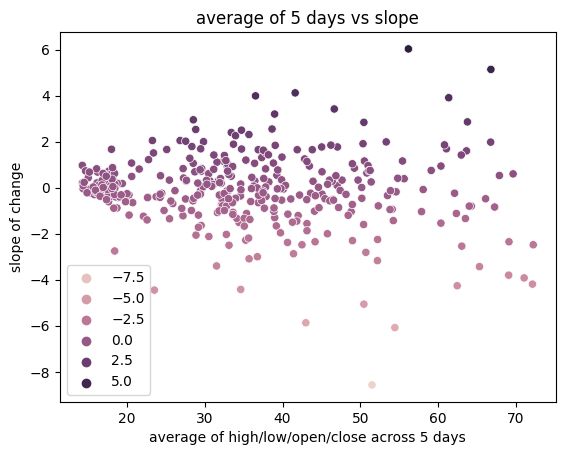

In [65]:

X = data[['Open', 'High', 'Low', 'Close']]
X, y = label_data(X, 5, 2)
error_score.append(compute(X, y))

In [66]:
for i in error_score:
	print(i)
sns.barplot(data=error_score)

((7.8254542235517155, 0.1332867896098603), (4.55099606103973, 0.4114765244844947))
((4.209879019211285, 0.03754054654694361), (5.096386806739967, 0.09746595055431861))
((2.259833630778794, 0.061371119506096306), (1.7110066620459443, 0.3841046110817742))


ValueError: Per-column arrays must each be 1-dimensional

In [85]:
logy = y
for i in range(0, len(logy)):
    if logy[i] > 0:
        logy[i] = 1
    else:
        logy[i] = 0
logX = X

# Creates the binary label based on the y data - if negative, designated with a 0. If positive, given a 1.

nsamples, nx, ny = np.array(logX).shape # X data is reshaped for logistic regression algorithm.
logX = np.array(logX).reshape((nsamples,nx*ny))

logX_train, logX_test, logy_train, logy_test = train_test_split(logX, logy, test_size=0.2, random_state=42) # Train-test split

logreg = LogisticRegression(random_state=42)

logreg.fit(logX_train, logy_train)
logy_pred = logreg.predict(logX_test)

print(logy_pred) # Predicted buys and sells



[0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]


C:\Users\armyb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
cnf_matrix = metrics.confusion_matrix(logy_test, logy_pred) 

print(cnf_matrix)

[[30 17]
 [21 22]]


Text(0.5, 427.9555555555555, 'Predicted label')

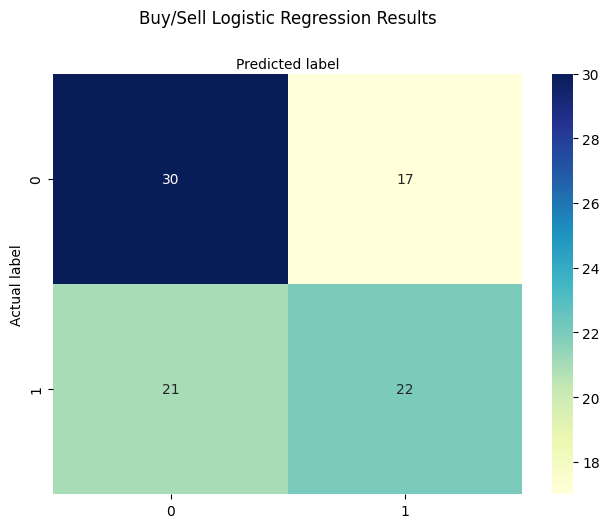

In [84]:
class_names=['Sell','Buy'] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Buy/Sell Logistic Regression Results', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

# Describes accuracy of predicted overlap between the actual buy/sell occurrences in the dataset and those instead
# predicted by the logistic regression mode;.